#Table of Contents
* [1. Week 4 Assignment: Generating a Correlation Coefficient](#1.-Week-4-Assignment:-Generating-a-Correlation-Coefficient)
	* [1.1 Subset the dataset into the moderate variable levels](#1.1-Subset-the-dataset-into-the-moderate-variable-levels)
	* [1.2 Pearson correlation $r$](#1.2-Pearson-correlation-$r$)
	* [1.3 Conclusion](#1.3-Conclusion)


# 1. Week 4 Assignment: Generating a Correlation Coefficient

In this [assignment](https://www.coursera.org/learn/data-analysis-tools/peer/3bv5A/testing-a-potential-moderator) I've chosen the [Gapminder](./data/gapminder.csv) dataset. Looking through its [codebook](./data/GapMinderCodebook.pdf) we've decided to study the relationship of the numeric variables `incomeperperson` and `lifeexpectancy` taking into account the numeric variable `urbanrate` as a potential moderator:


- incomeperperson

> 2010 Gross Domestic Product per capita in constant 2000 US$. The World Bank Work Development inflation but not the differences in the cost of living between countries Indicators
has been taken into account.



- lifeexpectancy

> 2011 life expectancy at birth (years). The average number of years a newborn child would live if current mortality patterns were to stay the same.


- urbanrate (potential moderator)

>2008 urban population (% of total). Urban population refers to people living in urban areas as defined by
national statistical offices (calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects).

In [3]:
# Import all ploting and scientific library,
# and embed figures in this file.
%pylab inline

# Package to manipulate dataframes.
import pandas as pd

# Nice looking plot functions.
import seaborn as sn

# The Pearson correlation function.
from scipy.stats import pearsonr

# Read the dataset.
df = pd.read_csv('data/gapminder.csv')

# Set the country name as the index of the dataframe.
df.index = df.country

# This column is no longer needed.
del df['country']

# Select only the variables we're interested.
df = df[['lifeexpectancy','incomeperperson', 'urbanrate']]

# Convert the types.
df.lifeexpectancy = pd.to_numeric(df.lifeexpectancy, errors='coerce')
df.incomeperperson = pd.to_numeric(df.incomeperperson, errors='coerce')
df.urbanrate = pd.to_numeric(df.urbanrate, errors='coerce')

# Remove missing values.
df = df.dropna()


Populating the interactive namespace from numpy and matplotlib


## 1.1 Subset the dataset into the moderate variable levels

In order to verifify whether the moderator variabel, `urbanrate`, plays a role into the interaction between `incomeperperon` and `lifeexpectancy`, we'll subset our dataset into two groups: onde group for countries below 50% of urbanrate population, and the other group with countries equal or above 50% of urbanrate population.

In [6]:
# Dataset with low urban rate.
df_low = df[df.urbanrate < 50]

# Dataset with high urban rate.
df_high = df[df.urbanrate >= 50]

## 1.2 Pearson correlation $r$

For each subset, we'll conduct the Pearson correlation analysis and verify the results.

In [7]:
r_low = pearsonr(df_low.incomeperperson, df_low.lifeexpectancy)
r_high = pearsonr(df_high.incomeperperson, df_high.lifeexpectancy)

In [10]:
print('Correlation in LOW urban rate: {}'.format(r_low))

Correlation in LOW urban rate: (0.46386851310251936, 4.061864446508275e-05)


In [11]:
print('Correlation in HIGH urban rate: {}'.format(r_high))

Correlation in HIGH urban rate: (0.62279808470824838, 1.6773499774746408e-12)


In [13]:
print('Percentage of variability LOW urban rate: {:2}%'.
      format(round(r_low[0]**2*100,2)))

Percentage of variability LOW urban rate: 21.52%


In [15]:
print('Percentage of variability HIGH urban rate: {:2}%'.
      format(round(r_high[0]**2*100,2)))

Percentage of variability HIGH urban rate: 38.79%


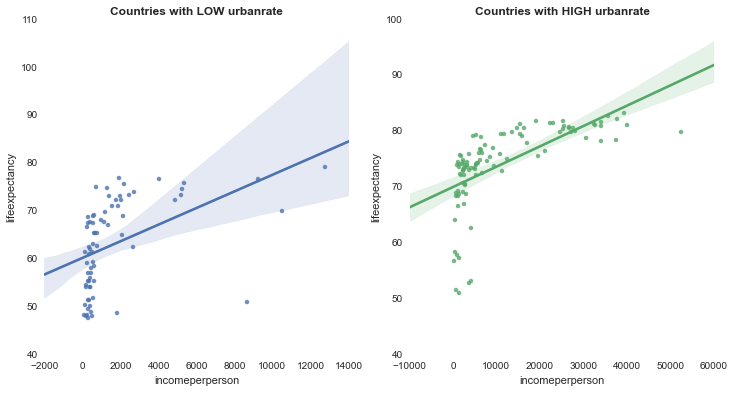

In [34]:
# Silent matplotlib warning. 
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Setting an apropriate size for the graph.
f,a = subplots(1, 2)
f.set_size_inches(12,6)

# Plot the graph.
sn.regplot(df_low.incomeperperson, df_low.lifeexpectancy, ax=a[0]);
a[0].set_title('Countries with LOW urbanrate', fontweight='bold');
sn.regplot(df_high.incomeperperson, df_high.lifeexpectancy, ax=a[1]);
a[1].set_title('Countries with HIGH urbanrate', fontweight='bold');


## 1.3 Conclusion

As we can see above, the correlation in countries with high urban rate, `urbanrate` $\ge 50\%$, is higher than in countries with low urban rate, and in both cases the $pvalue$ is significan. So, we can say the variable `urbanrate` moderates the relationship between `lifeexpectancy` and `incomeperperson`. 

End of assignment.